In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
df=pd.read_csv(r'C:\Users\aksha\Downloads\delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [4]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
df.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [6]:
df[['SortingTime','DeliveryTime']]=df[['Sorting Time','Delivery Time']]

In [7]:
df

,Delivery Time,Sorting Time,SortingTime,DeliveryTime
0,21.00,10,10,21.00
1,13.50,4,4,13.50
2,19.75,6,6,19.75
3,24.00,9,9,24.00
4,29.00,10,10,29.00
5,15.35,6,6,15.35
6,19.00,7,7,19.00
7,9.50,3,3,9.50
8,17.90,10,10,17.90
9,18.75,9,9,18.75


In [8]:
df=df.drop('Delivery Time',axis=1)


In [9]:
df=df.drop('Sorting Time',axis=1)


In [10]:
df

,SortingTime,DeliveryTime
0,10,21.00
1,4,13.50
2,6,19.75
3,9,24.00
4,10,29.00
5,6,15.35
6,7,19.00
7,3,9.50
8,10,17.90
9,9,18.75


In [11]:
corr=df.corr()
corr

,SortingTime,DeliveryTime
SortingTime,1.000000,0.825997
DeliveryTime,0.825997,1.000000


<Axes: >

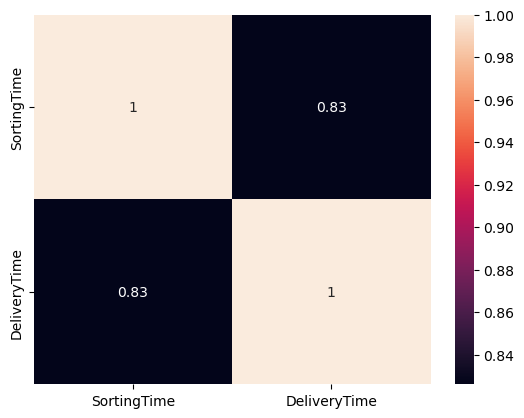

In [12]:
sns.heatmap(corr,annot=True)

<Axes: xlabel='DeliveryTime', ylabel='SortingTime'>

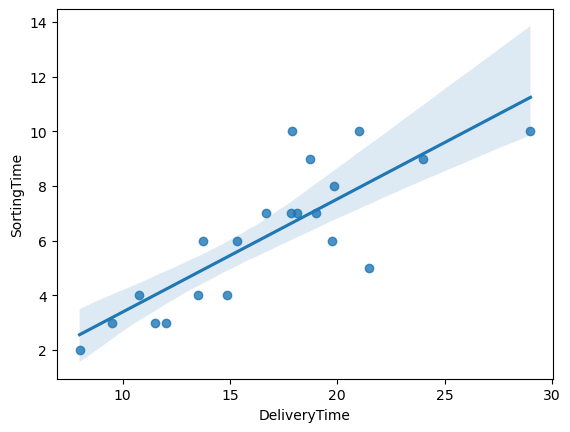

In [13]:
sns.regplot(x=df['DeliveryTime'],y=df['SortingTime'])

In [12]:
df.corr()

,SortingTime,DeliveryTime
SortingTime,1.000000,0.825997
DeliveryTime,0.825997,1.000000


C:\Users\aksha\AppData\Local\Temp\ipykernel_18888\1135293834.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DeliveryTime'])


<Axes: xlabel='DeliveryTime', ylabel='Density'>

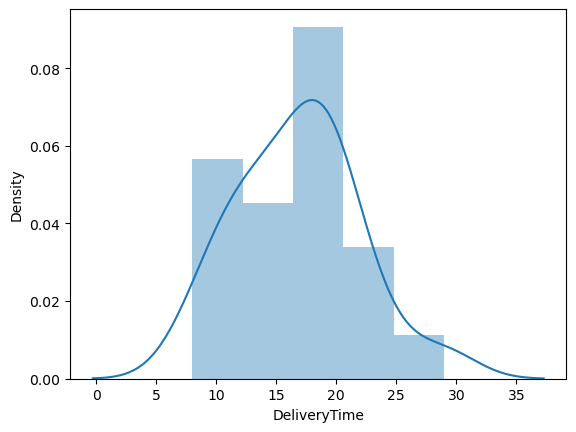

In [15]:
sns.distplot(df['DeliveryTime'])

C:\Users\aksha\AppData\Local\Temp\ipykernel_18888\3831698641.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SortingTime'])


<Axes: xlabel='SortingTime', ylabel='Density'>

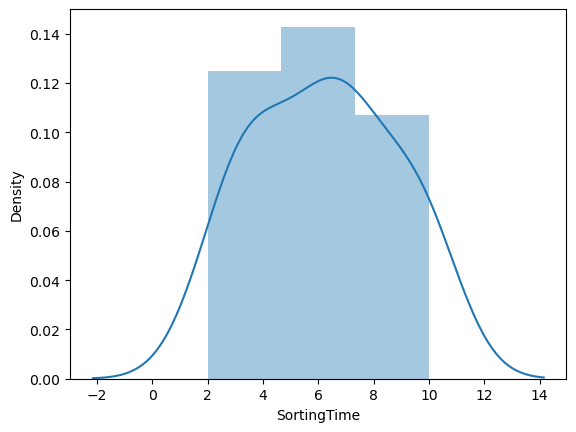

In [16]:
sns.distplot(df['SortingTime'])

## model using raw data

In [13]:
model=smf.ols('DeliveryTime~SortingTime',data=df).fit()

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 06 Jan 2024   Prob (F-statistic):           3.98e-06
Time:                        19:44:58   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [16]:
model.pvalues

Intercept      0.001147
SortingTime    0.000004
dtype: float64

In [17]:
model.rsquared

0.6822714748417231

In [18]:
model.rsquared_adj

0.6655489208860244

In [19]:
predt_raw=model.predict(df)

In [20]:
predt_raw

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [21]:
df_predt1=pd.DataFrame(df.SortingTime)

In [22]:
df_predt1

,SortingTime
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


In [23]:
df_predt1['Predicted']=predt_raw
df_predt1

,SortingTime,Predicted
0,10,23.072933
1,4,13.178814
2,6,16.476853
3,9,21.423913
4,10,23.072933
5,6,16.476853
6,7,18.125873
7,3,11.529794
8,10,23.072933
9,9,21.423913


In [25]:
from sklearn.metrics import mean_squared_error as mse

In [27]:
mse_raw=mse(y_true=df['DeliveryTime'],y_pred=df_predt1['Predicted'])
mse_raw

7.793311548584062

In [30]:
rmse=np.sqrt(mse_raw)
rmse

2.7916503270617654

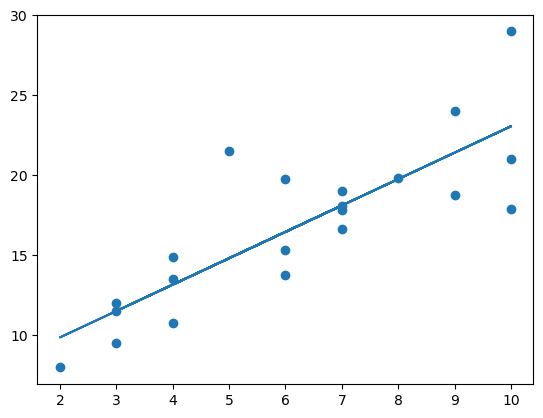

In [34]:
plt.scatter(df.SortingTime,df.DeliveryTime)
plt.plot(df.SortingTime,df_predt1['Predicted'])

### using Standardized data

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
std=StandardScaler()

In [37]:
df_std=pd.DataFrame(std.fit_transform(df),columns=df.columns)
df_std

,SortingTime,DeliveryTime
0,1.535625,0.849867
1,-0.882984,-0.664490
2,-0.076781,0.597474
3,1.132523,1.455610
4,1.535625,2.465181
5,-0.076781,-0.290949
6,0.326320,0.446038
7,-1.286086,-1.472148
8,1.535625,0.223933
9,1.132523,0.395560


In [38]:
model_std=smf.ols('DeliveryTime~SortingTime',data=df_std).fit()

In [39]:
model_std.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 06 Jan 2024   Prob (F-statistic):           3.98e-06
Time:                        19:56:44   Log-Likelihood:                -17.759
No. Observations:                  21   AIC:                             39.52
Df Residuals:                      19   BIC:                             41.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.274e-16      0.129  -4.08e-15      1.000      -0.271       0.271
SortingTime     0.8260      0.129      6.387      0.000       0.555       1.097
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
df_predt2=pd.DataFrame(df_std.SortingTime)

In [43]:
df_predt2['Predicted']=model_std.predict(df_predt2)
df_predt2

,SortingTime,Predicted
0,1.535625,1.268422
1,-0.882984,-0.729342
2,-0.076781,-0.063421
3,1.132523,0.935461
4,1.535625,1.268422
5,-0.076781,-0.063421
6,0.326320,0.269540
7,-1.286086,-1.062303
8,1.535625,1.268422
9,1.132523,0.935461


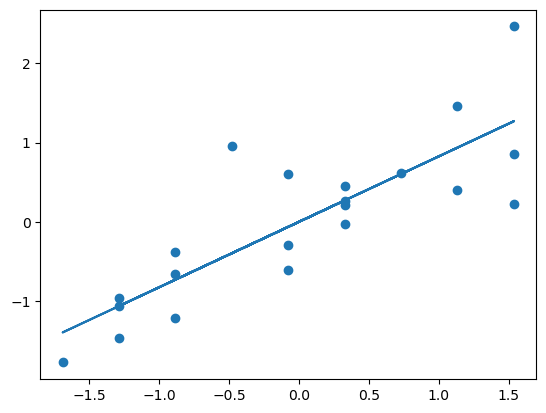

In [46]:
plt.scatter(df_std.SortingTime,df_std.DeliveryTime)
plt.plot(df_predt2.SortingTime,df_predt2.Predicted)

In [48]:
mse_std=mse(y_true=df_std.DeliveryTime,y_pred=df_predt2.Predicted)
mse_std

0.3177285251582769

In [49]:
rmse_std=np.sqrt(mse_std)
rmse_std

0.563674130290079

### Normalization

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
mim=MinMaxScaler()

In [53]:
df_norm=pd.DataFrame(mim.fit_transform(df),columns=df.columns)
df_norm

,SortingTime,DeliveryTime
0,1.000,0.619048
1,0.250,0.261905
2,0.500,0.559524
3,0.875,0.761905
4,1.000,1.000000
5,0.500,0.350000
6,0.625,0.523810
7,0.125,0.071429
8,1.000,0.471429
9,0.875,0.511905


In [54]:
model_norm=smf.ols('DeliveryTime~SortingTime',data=df_norm).fit()

In [55]:
model_norm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 06 Jan 2024   Prob (F-statistic):           3.98e-06
Time:                        20:07:00   Log-Likelihood:                 12.578
No. Observations:                  21   AIC:                            -21.16
Df Residuals:                      19   BIC:                            -19.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0896      0.060      1.496      0.151      -0.036       0.215
SortingTime     0.6282      0.098      6.387      0.000       0.422       0.834
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         4.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
df_predt3=pd.DataFrame(df_norm['SortingTime'])

In [64]:
df_predt3

,SortingTime
0,1.000
1,0.250
2,0.500
3,0.875
4,1.000
5,0.500
6,0.625
7,0.125
8,1.000
9,0.875


In [65]:
df_predt3['Predicted']=model_norm.predict(df_predt3)

In [66]:
df_predt3

,SortingTime,Predicted
0,1.000,0.717759
1,0.250,0.246610
2,0.500,0.403660
3,0.875,0.639234
4,1.000,0.717759
5,0.500,0.403660
6,0.625,0.482184
7,0.125,0.168085
8,1.000,0.717759
9,0.875,0.639234


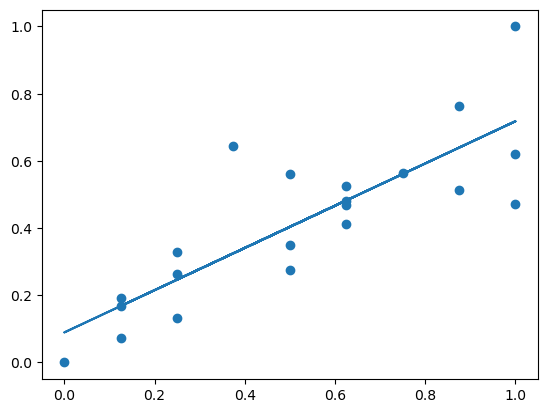

In [68]:
plt.scatter(df_norm.SortingTime,df_norm.DeliveryTime)
plt.plot(df_norm.SortingTime,df_predt3.Predicted)

In [70]:
mse_norm=mse(y_true=df_norm.DeliveryTime,y_pred=df_predt3.Predicted)
mse_norm

0.01767190827343325

In [72]:
rmse_norm=np.sqrt(mse_norm)
rmse_norm

0.13293572986008406

### using log transformation

In [74]:
df_log=pd.DataFrame(np.log(df),columns=df.columns)
df_log

,SortingTime,DeliveryTime
0,2.302585,3.044522
1,1.386294,2.602690
2,1.791759,2.983153
3,2.197225,3.178054
4,2.302585,3.367296
5,1.791759,2.731115
6,1.945910,2.944439
7,1.098612,2.251292
8,2.302585,2.884801
9,2.197225,2.931194


In [99]:
model_log=smf.ols('DeliveryTime~SortingTime',data=df_log).fit()

In [100]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Sat, 06 Jan 2024   Prob (F-statistic):           1.60e-07
Time:                        20:50:17   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.7420      0.133     13.086      0.000       1.463       2.021
SortingTime     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
df_predt4=pd.DataFrame(df_log['SortingTime'])
df_predt4

,SortingTime
0,2.302585
1,1.386294
2,1.791759
3,2.197225
4,2.302585
5,1.791759
6,1.945910
7,1.098612
8,2.302585
9,2.197225


In [78]:
df_predt4['Predicted']=model_log.predict(df_predt4)

In [79]:
df_predt4

,SortingTime,Predicted
0,2.302585,3.117833
1,1.386294,2.570329
2,1.791759,2.812603
3,2.197225,3.054878
4,2.302585,3.117833
5,1.791759,2.812603
6,1.945910,2.904712
7,1.098612,2.398432
8,2.302585,3.117833
9,2.197225,3.054878


In [80]:
mse_log=mse(y_true=df_log.DeliveryTime,y_pred=df_predt4.Predicted)
mse_log

0.021973058112488137

In [81]:
rmse_log=np.sqrt(mse_log)

In [82]:
rmse_log

0.14823312083501494

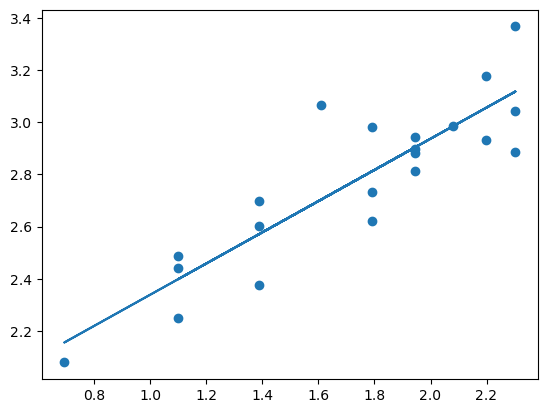

In [83]:
plt.scatter(df_log.SortingTime,df_log.DeliveryTime)
plt.plot(df_log.SortingTime,df_predt4.Predicted)

### using sqrt transformation

In [84]:
df_sqrt=pd.DataFrame(np.sqrt(df),columns=df.columns)
df_sqrt

,SortingTime,DeliveryTime
0,3.162278,4.582576
1,2.000000,3.674235
2,2.449490,4.444097
3,3.000000,4.898979
4,3.162278,5.385165
5,2.449490,3.917908
6,2.645751,4.358899
7,1.732051,3.082207
8,3.162278,4.230839
9,3.000000,4.330127


In [88]:
model_sqrt=smf.ols('DeliveryTime~SortingTime',data=df_sqrt).fit()

In [89]:
model_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Sat, 06 Jan 2024   Prob (F-statistic):           8.48e-07
Time:                        20:38:44   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.6135      0.349      4.628      0.000       0.884       2.343
SortingTime     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
df_predt5=pd.DataFrame(df_sqrt['SortingTime'])
df_predt5

,SortingTime
0,3.162278
1,2.000000
2,2.449490
3,3.000000
4,3.162278
5,2.449490
6,2.645751
7,1.732051
8,3.162278
9,3.000000


In [91]:
df_predt5['Predicted']=model_sqrt.predict(df_predt5)

In [92]:
df_predt5

,SortingTime,Predicted
0,3.162278,4.782767
1,2.000000,3.617912
2,2.449490,4.068399
3,3.000000,4.620129
4,3.162278,4.782767
5,2.449490,4.068399
6,2.645751,4.265095
7,1.732051,3.349369
8,3.162278,4.782767
9,3.000000,4.620129


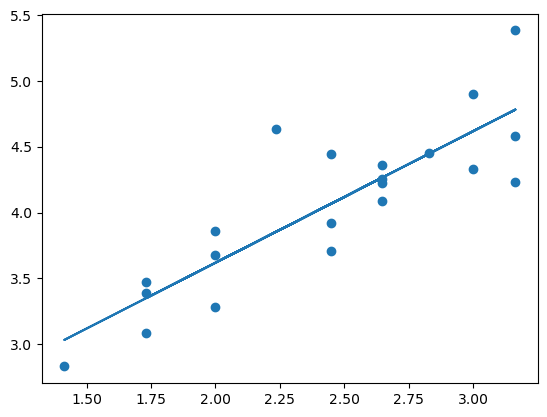

In [94]:
plt.scatter(df_sqrt.SortingTime,df_sqrt.DeliveryTime)
plt.plot(df_sqrt.SortingTime,df_predt5.Predicted)

In [95]:
mse_sqrt=mse(y_true=df_sqrt.DeliveryTime,y_pred=df_predt5.Predicted)

In [96]:
mse_sqrt

0.1010669038561377

In [97]:
rmse_sqrt=np.sqrt(mse_sqrt)

In [98]:
rmse_sqrt

0.3179102135134033

In [102]:
final_df=pd.DataFrame({'MODEL':['Raw Data','Standardized','Normalized','Log Transformation','Sqrt Transformation'],
                      'RSquared':[model.rsquared,model_std.rsquared,model_norm.rsquared,model_log.rsquared,model_sqrt.rsquared],
                      'MSE':[mse_raw,mse_std,mse_norm,mse_log,mse_sqrt],
                      'RMSE':[rmse,rmse_std,rmse_norm,rmse_log,rmse_sqrt]})

In [103]:
final_df

,MODEL,RSquared,MSE,RMSE
0,Raw Data,0.682271,7.793312,2.791650
1,Standardized,0.682271,0.317729,0.563674
2,Normalized,0.682271,0.017672,0.132936
3,Log Transformation,0.772161,0.021973,0.148233
4,Sqrt Transformation,0.729201,0.101067,0.317910
